# Swan Teleco project

In [2]:
# The Big 4
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Model performance metrics
from sklearn import metrics
from time import time

# Sklearn model tools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [3]:
df = pd.read_csv("1 - Project Data.csv")

In [4]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [5]:
df.shape

(7043, 31)

In [6]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [7]:
# Mapping columns to get binary results
def columns_binary(x):
    if x == 'Yes':
        return 1
    else:
        return 0

def feature_eng(df):
    # Drop non-useful columns
    df = df.drop(columns = ['CustomerID', 'Count', 'Country', 'State', 'City',
       'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason'],axis = 1) # We already have Churn Value which is already a numerical

    
    # Change yes/no(including: No internet/Phone services) to binary
    df['Senior Citizen'] = df['Senior Citizen'].apply(columns_binary)
    df['Partner'] = df['Partner'].apply(columns_binary)
    df['Dependents'] = df['Dependents'].apply(columns_binary)
    df['Phone Service'] = df['Phone Service'].apply(columns_binary)
    df['Multiple Lines'] = df['Multiple Lines'].apply(columns_binary)
    df['Online Security'] = df['Online Security'].apply(columns_binary)
    df['Device Protection'] = df['Device Protection'].apply(columns_binary)
    df['Online Backup'] = df['Online Backup'].apply(columns_binary)
    df['Tech Support'] = df['Tech Support'].apply(columns_binary)
    df['Streaming TV'] = df['Streaming TV'].apply(columns_binary)
    df['Streaming Movies'] = df['Streaming Movies'].apply(columns_binary)
    df['Paperless Billing'] = df['Paperless Billing'].apply(columns_binary)

    # Changing columns with only two results to numericals
    df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
    
    # OHE columns
    df = pd.get_dummies(df, columns = ['Internet Service'], drop_first = True, prefix = 'Internet Service', dtype=int)
    df = pd.get_dummies(df, columns = ['Contract'], drop_first = True, prefix = 'Contract', dtype=int)
    df = pd.get_dummies(df, columns = ['Payment Method'], drop_first = True, prefix = 'Payment Method', dtype=int)


    # Scaling 
    # continuous_cols = ['Monthly Charges', 'Total Charges', 'Tenure Months']
    # Standard
    # df[continuous_cols] = scaler_standard.fit_transform(df[continuous_cols])
    # Min-Max Scaling
    # df['continuous_cols'] = scaler_minmax.fit_transform(df['continuous_cols'])
    # Robust
    # df['continuous_cols'] = scaler_robust.fit_transform(df['continuous_cols'])
    # Bucket option?
    
    
    # Upscale / Downscale data to get a balanced churn/non-churned split
    
    
    return df

In [8]:
# Apply our feature engineering
df = feature_eng(df)

In [9]:
df.info() # Should have no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  7043 non-null   int64  
 1   Senior Citizen                          7043 non-null   int64  
 2   Partner                                 7043 non-null   int64  
 3   Dependents                              7043 non-null   int64  
 4   Tenure Months                           7043 non-null   int64  
 5   Phone Service                           7043 non-null   int64  
 6   Multiple Lines                          7043 non-null   int64  
 7   Online Security                         7043 non-null   int64  
 8   Online Backup                           7043 non-null   int64  
 9   Device Protection                       7043 non-null   int64  
 10  Tech Support                            7043 non-null   int6

In [10]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Monthly Charges,Total Charges,Churn Value,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
1,1,0,0,1,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
2,1,0,0,1,8,1,1,0,0,1,...,99.65,820.5,1,1,0,0,0,0,1,0
3,1,0,1,1,28,1,1,0,0,1,...,104.80,3046.05,1,1,0,0,0,0,1,0
4,0,0,0,1,49,1,1,0,1,1,...,103.70,5036.3,1,1,0,0,0,0,0,0


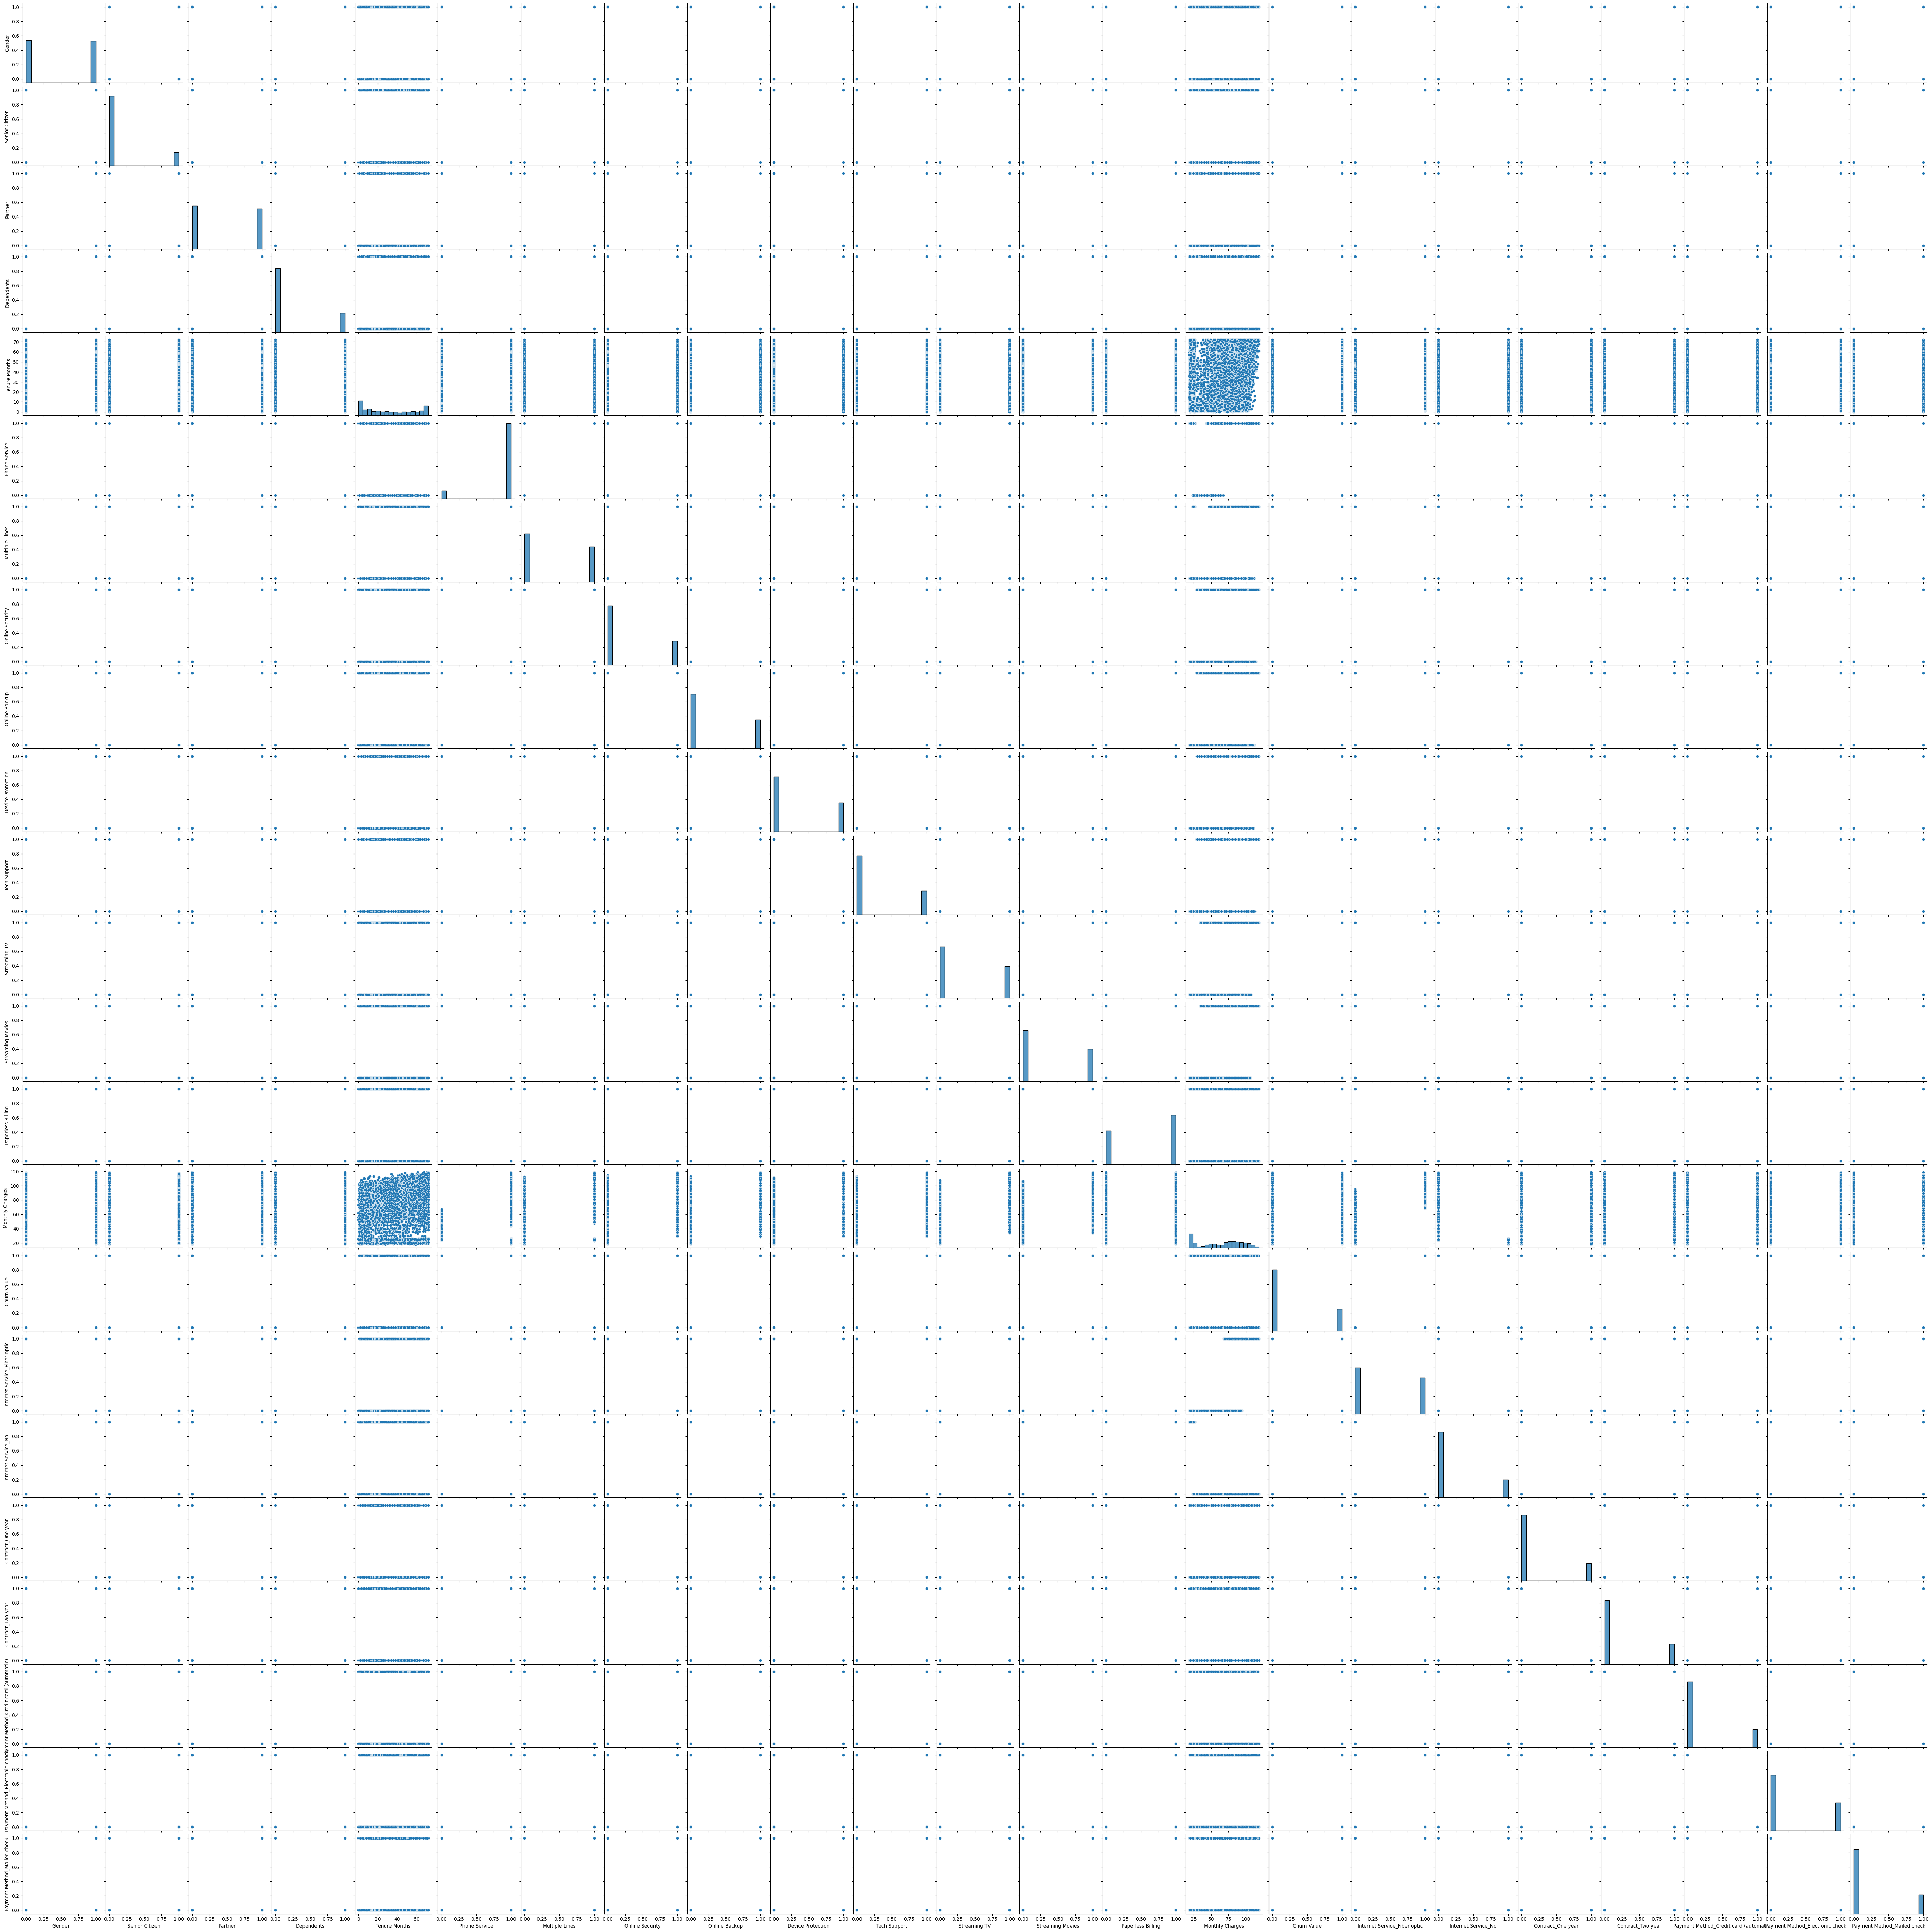

In [11]:
sns.pairplot(df)
plt.show()

In [44]:
df_corr = df.corr(numeric_only = True)
df_corr

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Paperless Billing,Monthly Charges,Churn Value,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
Gender,1.000000,0.001874,0.001808,-0.005229,-0.005106,0.006488,0.008414,0.017021,0.013773,0.002105,...,0.011754,0.014569,0.008612,0.011286,-0.006026,-0.008026,0.003695,-0.001215,-0.000752,-0.013744
Senior Citizen,0.001874,1.000000,0.016479,-0.174396,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,...,0.156530,0.220173,0.150889,0.255338,-0.182742,-0.046262,-0.117000,-0.024135,0.171718,-0.153477
Partner,0.001808,0.016479,1.000000,0.363430,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,...,-0.014877,0.096848,-0.150448,0.000304,0.000615,0.082783,0.248091,0.082029,-0.083852,-0.095125
Dependents,-0.005229,-0.174396,0.363430,1.000000,0.131376,0.000625,-0.027510,0.050353,0.003457,-0.022343,...,-0.118963,-0.144206,-0.248542,-0.162353,0.172110,0.014680,0.190262,0.041254,-0.141476,0.071056
Tenure Months,-0.005106,0.016567,0.379697,0.131376,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,...,0.006152,0.247900,-0.352229,0.019720,-0.039062,0.202570,0.558533,0.233006,-0.208363,-0.233852
Phone Service,0.006488,0.008576,0.017706,0.000625,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,...,0.016505,0.247398,0.011942,0.289999,0.172209,-0.002791,0.003519,-0.007721,0.003062,-0.003319
Multiple Lines,0.008414,0.142948,0.142057,-0.027510,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,...,0.163530,0.490434,0.040102,0.366083,-0.210564,-0.003794,0.106253,0.060048,0.083618,-0.227206
Online Security,0.017021,-0.038653,0.143106,0.050353,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,...,-0.003636,0.296594,-0.171226,-0.030696,-0.333403,0.100162,0.191773,0.115721,-0.112338,-0.080798
Online Backup,0.013773,0.066572,0.141498,0.003457,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,...,0.126735,0.441780,-0.082255,0.165651,-0.381593,0.083722,0.111400,0.090785,-0.000408,-0.174164
Device Protection,0.002105,0.059428,0.153786,-0.022343,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,...,0.103797,0.482692,-0.066160,0.176049,-0.380754,0.102495,0.165096,0.111554,-0.003351,-0.187373


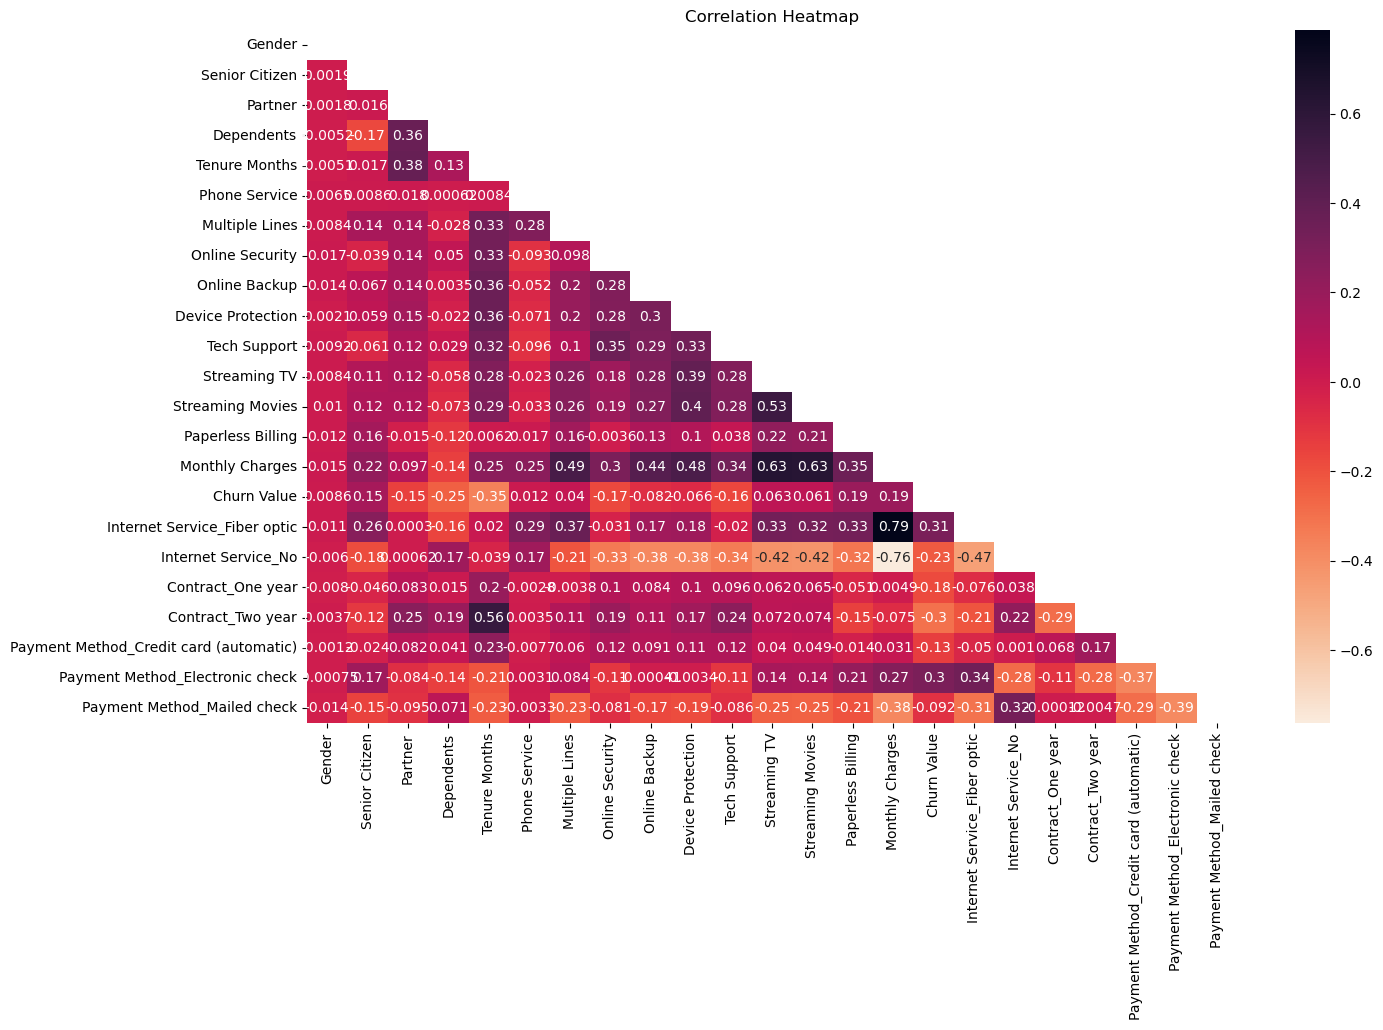

In [42]:
plt.figure(figsize=(15,9))
# sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
sns.heatmap(df_corr, annot=True, cmap='rocket_r', mask = np.triu(df_corr))

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()
